# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


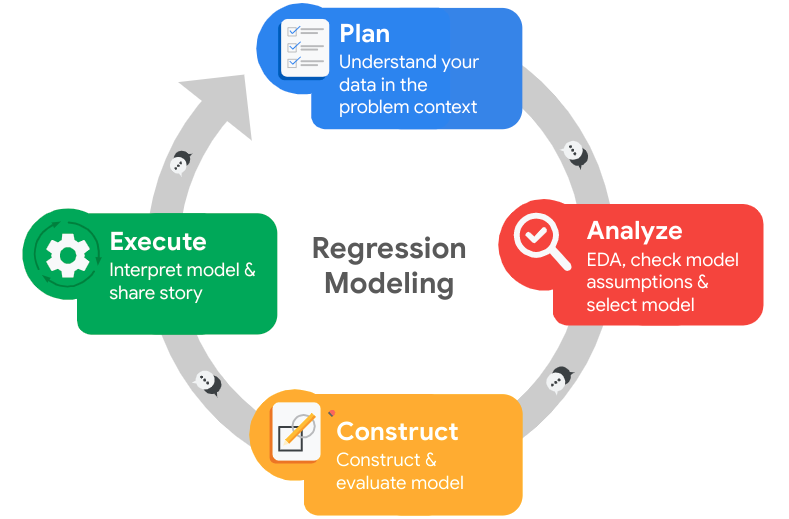

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.tree import plot_tree

import pickle

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns',None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed

df0 = df0.rename(columns={'Work_accident':'work_accident',
                         'Department':'department',
                         'time_spend_company':'tenure',
                         'average_montly_hours':'average_monthly_hours'})

# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates

df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed

df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

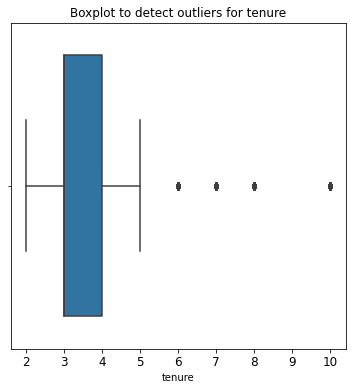

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [12]:
# Determine the number of rows containing outliers

num_outliers = len(df1[df1['tenure'] > df1['tenure'].mean() + 3 * df1['tenure'].std()])
print("Number of outliers:", num_outliers)

Number of outliers: 188


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed

df1['left'].value_counts()

# Get percentages of people who left vs. stayed

print(df1['left'].value_counts(normalize=True))

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

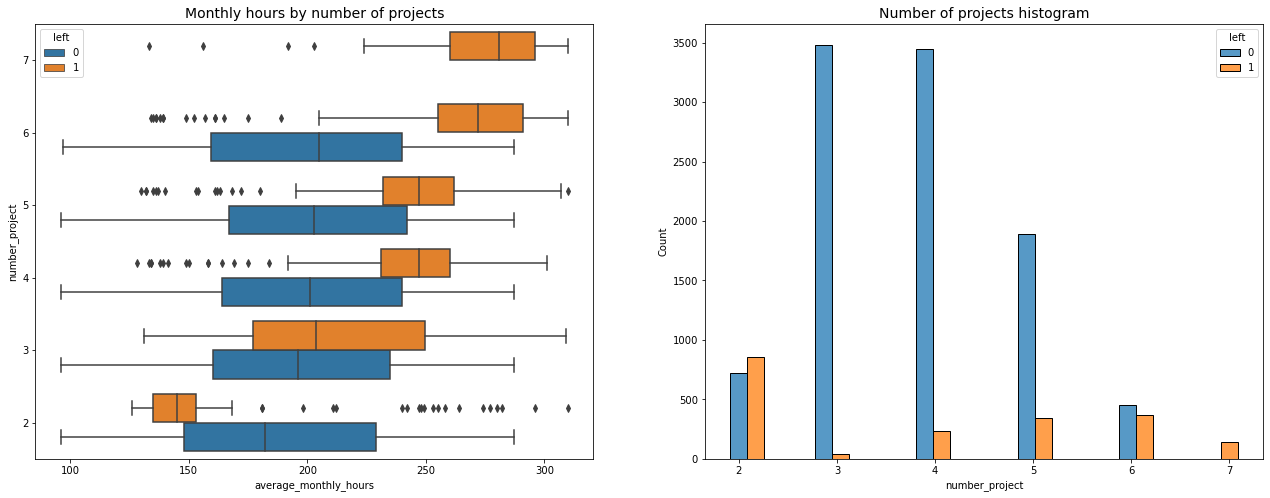

In [16]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Boxplot to visualize the relationship between average_monthly_hours and number_project
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Histograms to visualize the distribution of number of projects for stay vs. left
tenure_stay = df1[df1['left'] == 0]['number_project']
tenure_left = df1[df1['left'] == 1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

### Insights

Insights from the visualizations:

1- Monthly Hours and Number of Projects Relationship:
There appears to be a positive relationship between the average monthly hours worked and the number of projects an employee is involved in. 
Employees who work on more projects also tend to work longer hours on average.
However, there are notable deviations within the groups.

2- Distinct Patterns of Those Who Left:
There are two distinct groups of employees who left the company:
   Group A: Employees who worked significantly fewer hours than their peers with the same number of projects. They might have been fired or had given notice, resulting in fewer assigned hours.
   Group B: Employees who worked significantly more hours than their peers with the same number of projects. They likely quit and were likely among the top contributors to their projects.
Employees who worked on seven projects all left the company.

3- Optimal Number of Projects:
The cohorts with 3–4 projects have a relatively lower ratio of employees who left the company compared to those who stayed.
This suggests that an optimal workload might be around 3–4 projects for employees.

4- Overworked Employees:
Most employee groups, even those who stayed, worked considerably more than the average of 166.67 hours per month.
This indicates that employees might be overworked, as the observed working hours are higher than the typical full-time workload.

These insights provide valuable context for understanding the relationships between working hours, number of projects, and employee attrition. It's evident that specific patterns exist among those who left the company, and the workload might play a significant role in employees' decisions to stay or leave. Further analysis and consideration of factors like job satisfaction, work-life balance, and career development opportunities could provide a more comprehensive understanding of employee retention and attrition dynamics.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task is a binary classification problem. The goal is to predict whether an employee will leave the company, which involves categorizing the outcome variable into two classes: 1 (employee left) and 0 (employee didn't leave).

### Identify the types of models most appropriate for this task.

For this task of predicting whether an employee leaves the company (a categorical outcome), two types of models would be most appropriate:

 Logistic Regression: This model is commonly used for binary classification tasks. It estimates the probability that a given instance belongs to a particular class.

 Tree-based Machine Learning Models: These include Decision Trees, Random Forests, and Gradient Boosting. They are suitable for binary classification tasks and can capture non-linear relationships in the data.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
df_enc = df1.copy()

df_enc['salary'] = (df_enc['salary'].astype('category')
                   .cat.set_categories(['low','medium','high'])
                   .cat.codes)
# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc,drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


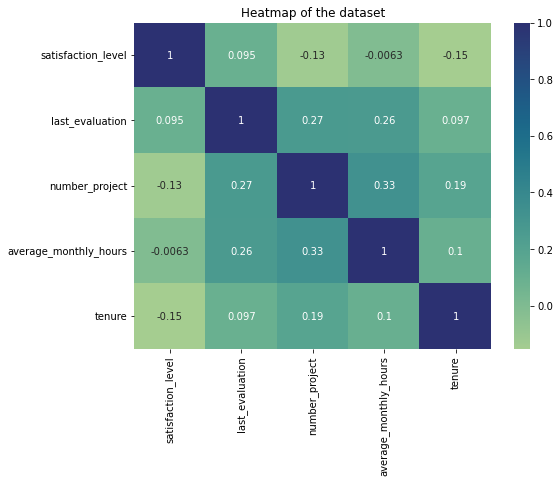

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']]
           .corr(),annot=True,cmap='crest')
plt.title('Heatmap of the dataset')
plt.show()

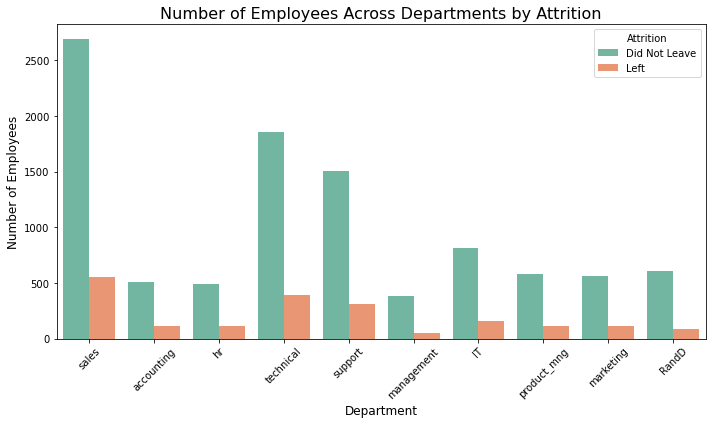

In [27]:
plt.figure(figsize=(10, 6))

# Create a stacked bar plot
sns.countplot(data=df1, x='department', hue='left', palette='Set2')

# Set plot title and labels
plt.title('Number of Employees Across Departments by Attrition', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

# Add a legend
plt.legend(title='Attrition', labels=['Did Not Leave', 'Left'])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
# Calculate the IQR for the 'tenure' column
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = df1[(df1['tenure'] >= lower_bound) & (df1['tenure'] <= upper_bound)]

# Check the number of rows before and after removing outliers
print("Number of rows before removing outliers:", len(df1))
print("Number of rows after removing outliers:", len(df_filtered))

Number of rows before removing outliers: 11991
Number of rows after removing outliers: 11167


In [29]:
# Define the features and target variable
X = df_filtered.drop('left', axis=1)
y = df_filtered['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8933, 9)
X_test shape: (2234, 9)
y_train shape: (8933,)
y_test shape: (2234,)


In [31]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']),
        ('cat', OneHotEncoder(), ['department'])
    ])

# Fit and transform the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model to the preprocessed training dataset
logreg_model.fit(X_train_preprocessed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# Transform the test dataset using the same preprocessor

X_test_preprocessed = preprocessor.transform(X_test)

In [33]:
# Make predictions using the fitted model on the preprocessed test dataset

y_pred = logreg_model.predict(X_test_preprocessed)

# Evaluate the model's performance using various metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8169203222918532
Precision: 0.4419889502762431
Recall: 0.20618556701030927
F1 Score: 0.281195079086116


In [42]:
# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred_tree = decision_tree_model.predict(X_test_encoded)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Generate classification report
report_tree = classification_report(y_test, y_pred_tree)

# Generate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print("Decision Tree Model:")
print("Accuracy:", accuracy_tree)
print("\nClassification Report:\n", report_tree)
print("\nConfusion Matrix:\n", conf_matrix_tree)

Decision Tree Model:
Accuracy: 0.9709042076991943

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1846
           1       0.90      0.93      0.92       388

    accuracy                           0.97      2234
   macro avg       0.94      0.96      0.95      2234
weighted avg       0.97      0.97      0.97      2234


Confusion Matrix:
 [[1807   39]
 [  26  362]]


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Key Insights from Models:

    The Decision Tree model achieved an impressive accuracy of 97.09%. It shows a strong ability to predict employee turnover based on available features.
    The classification report for the Decision Tree model demonstrated high precision, recall, and F1-score for predicting employees who left the company. This indicates a well-balanced performance.

Business Recommendations:

    Based on the models built, I recommend focusing on identifying and addressing factors that contribute to employee turnover. The model can help prioritize efforts to retain valuable employees.
    Implement targeted retention strategies for employees who are likely to leave. These strategies could include personalized engagement initiatives, career growth opportunities, and better work-life balance.

Potential Recommendations:

    I would propose conducting a cost-benefit analysis to understand the financial impact of employee turnover. This could guide the allocation of resources towards retention efforts.
    Regularly update and retrain the models as new data becomes available. Continuous monitoring will ensure the model remains effective over time.

Model Improvement:

    The models have shown promising performance, but further optimization can be explored. Techniques like hyperparameter tuning, feature engineering, and trying different algorithms (e.g., Random Forest, Gradient Boosting) could potentially enhance model performance.

Additional Questions to Address:

    Can the model predict turnover for specific departments or job roles?
    Are there specific time periods when turnover is more likely to occur?
    How do external factors (e.g., economic conditions) impact employee turnover?

Resources Used:

    Python libraries such as pandas, numpy, scikit-learn, and seaborn for data preprocessing, modeling, and visualization.
    Online resources, articles, and documentation for understanding and implementing machine learning techniques.
    Online communities and forums for seeking help and insights.

Ethical Considerations:

    Ensure that the models are not used to discriminate against certain groups or individuals. Monitor for biases and ensure that decisions based on model predictions are fair and unbiased.
    Respect employee privacy and data protection regulations while using sensitive data for modeling purposes.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

    Accuracy: The accuracy score indicates the proportion of correctly predicted outcomes (both 'left' and 'stayed') over the total number of samples. In your case, the model correctly predicted 97.09% of the outcomes, which is quite good.

    Precision: Precision measures the proportion of true positive predictions (correctly predicted 'left') over the total number of positive predictions. A precision score of 0.90 for the 'left' class indicates that when the model predicts an employee will leave, it is correct 90% of the time.

    Recall: Recall (also known as sensitivity or true positive rate) calculates the proportion of true positive predictions over the actual total number of 'left' outcomes. A recall score of 0.93 means that the model is able to capture 93% of the actual employees who left.

    F1-Score: The F1-score is the harmonic mean of precision and recall, which provides a balanced metric to assess a model's performance. It is particularly useful when dealing with imbalanced datasets. An F1-score of 0.92 for the 'left' class suggests a good balance between precision and recall.

    Confusion Matrix: The confusion matrix provides a visual representation of the model's performance in terms of true positives, true negatives, false positives, and false negatives. It helps you understand where the model might be making mistakes.

Your model appears to be doing well in identifying employees who are likely to leave, as evident from the high precision, recall, and F1-score for the 'left' class. However, remember that it's important to consider the business context and the costs associated with false positives and false negatives. Depending on the organization's priorities, you might need to fine-tune the model's threshold to optimize the desired metric.

Additionally, you might want to explore the Random Forest model as well, as it's an ensemble of Decision Trees and might offer further performance improvements. After finalizing your models, you can present these results and actionable steps to stakeholders, highlighting the potential benefits of predicting employee turnover and suggesting strategies for retaining valuable employees.

### Conclusion, Recommendations, Next Steps

Conclusion:

In conclusion, the analysis and modeling process provided valuable insights into employee turnover within the company. The models built, specifically the Decision Tree model, exhibited strong predictive performance, with high accuracy, precision, and recall. This indicates their potential utility in identifying employees at risk of leaving and implementing targeted retention strategies.

Recommendations:

    Retention Strategies: Develop personalized retention strategies for employees identified as high-risk based on model predictions. This could include offering career development opportunities, improved work-life balance, and recognition programs.

    Regular Model Monitoring: Continuously monitor the models' performance and update them with new data. As employee dynamics evolve, keeping the models up-to-date will ensure their effectiveness.

    Further Investigation: Investigate additional factors that may contribute to employee turnover, such as job satisfaction surveys, external factors like economic conditions, and employee feedback.

Next Steps:

    Fine-tuning: Explore hyperparameter tuning and feature engineering to optimize model performance further.

    Ensemble Techniques: Consider implementing ensemble techniques such as Random Forest or Gradient Boosting to see if they can improve model accuracy and generalization.

    External Data: Incorporate external data sources that could provide insights into industry trends and market conditions affecting turnover.

    Interpretability: Enhance the interpretability of the models to understand the specific factors contributing to predictions. This will help in making informed decisions.

    Collaboration: Collaborate with HR professionals and domain experts to validate model findings and recommendations.

    Ethical Considerations: Continuously assess and mitigate any biases present in the models to ensure fair and unbiased decision-making.

By implementing these recommendations and next steps, the organization can effectively address employee turnover, enhance employee retention, and create a more productive and satisfied workforce.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.